# Bank Stock Value Prediction
## **Data Understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500) # your numbers here
pd.set_option('display.max_columns', 500)

In [2]:
sns.set(rc={'figure.figsize': (18,6)})

In [3]:
car_df = pd.read_csv('Data/car_v3.csv')

### **What does the data look like?**
    We have balance sheet features expressed in dollars
    We have income statement features expressed id dollars
    We have performance-ratio features
    We have segment banks based on asset size:  small, medium, and large

In [4]:
car_df.shape

(5542, 123)

### **Segment features into balance/income statement versus performance ratios**
    1.Create segment based on balance sheet and income statement features
    2.Create segment based on performance ratio features

In [5]:
#Create balance sheet and income statement dataframe
bal_inc_df = car_df.iloc[0:,0:]
#Drop performance ratios features but keep last row (bank size) and other rows.
bal_inc_df.drop(bal_inc_df.iloc[:,65:98], inplace=True, axis=1)
bal_inc_df.drop(columns=['Cert', 'address', 'City', 'State', 'Zip', 'Report Date', 'mutual','% Insured'], inplace=True)
bal_inc_df = bal_inc_df.iloc[0:,1:]

In [6]:
bal_inc_df.head()

,Fed RSSD,Bank Name,offdom,Number Employees,Total Assets,Cash & Bal Due DI,Cash Balance IB,Total Securities,FedFunds Sold Rev Purch,Net Loans Leases,Loan Allowance Loss,Trading Acct Assets,Bank Premises Fixed Assets,Other RE Owned,Goodwill Intangibles,All Other Assets,Total Liab Equity,Total Liabilities,Total Deposits,Interest-bearing Deposits,Deposits Domestic,Feds Funds Purchased,Trading Liabilities,Other Borrowed Funds,Subordinated Debt,All Other Liabilities,Total Equity,Bank Equity,Perpertual Pref Stock,Common Stock,Surplus,Undivided Profits,Equity Minor Interest,Noncurrent Loans Leases,Noncurrent Loans Leases Guaranteed,Income Earned,Earning Assets,Long-term Assets,Average Total Assets,Average Assets Quart,Total Risk Weighted Assets,Adjusted Average Assets,Life Insurance Assets,General Acct Life Insurance,Separate Acct Life Insurance,Hybrid Life Insurance,Volatile Liabilities,Insider Loans,FHLB advances,Loans Leases held for sale,Unused Loan Commitments,Tier One Capital,Tier 2 Risk-based capital,Total Unused Commitments,Derivatives,Yield on Earning Assets,Total Interest Income,Total Interest Expense,Net Interest Income,Provision Loan Lease Losses,Total NonInterest Income,Gross Fid Act Income,Service Charges Deposit Accts,Additional NonInterest Income,Total NonInterest Expense,Salaries Employee Benefits,Premises Equipment Expense,Additional NonInterest Expense,Pre-tax Net Op Income,Securities gains loss,Income Tax,Income before ext items,Extraordinary Gains,Net Income,Minority Interest NI,Net income of bank and min int,Net Charge-offs,Cash Dividends,Sale Conversion Ret Stock,Net Operating Income,Bank Size
0,746223,1880 Bank,6,48.0,343830,26199,22763.0,35457,383,250939,1824.0,0,5248.0,649.0,2313.0,22642,343830,293711,288063,205200.0,288063,0,0,0,0.0,5648,50119.0,50119.0,0.0,13242.0,33764.0,3113.0,0.0,5335,0.0,690.0,309542.0,98947.0,349437.00,346860.5,247420.0,340697.0,14091.0,4244.0,0.0,9847.0,17400.0,5164.0,0.0,0.0,33579,45082.0,2082.0,33579,0.0,4.147104,6551.0,436.0,6115.0,74.0,925.0,0.0,374.0,551,4593.0,2054.0,569.0,1970,2373,0.0,574.0,1799.0,0.0,1799.0,0.0,1799.0,96.0,0.0,0.0,1799.0,Medium
1,3317192,1st Advantage Bank,1,18.0,100617,5372,4321.0,3197,0,85815,789.0,0,2024.0,3220.0,0.0,989,100617,90171,79002,62773.0,79002,0,0,11000,0.0,169,10446.0,10446.0,0.0,534.0,16797.0,-6885.0,0.0,27,0.0,209.0,93333.0,6923.0,101469.00,101429.5,86558.0,100970.0,0.0,0.0,0.0,0.0,11727.0,1836.0,11000.0,0.0,12494,10482.0,789.0,12494,0.0,4.588862,2164.0,467.0,1697.0,60.0,91.0,0.0,22.0,69,1514.0,897.0,124.0,493,214,0.0,0.0,214.0,0.0,214.0,0.0,214.0,-20.0,0.0,0.0,214.0,Medium
2,564856,1st Bank,1,9.0,49045,23525,20429.0,0,0,23816,899.0,0,946.0,0.0,0.0,758,49044,42387,42255,30940.0,42255,0,0,0,0.0,132,6657.0,6657.0,0.0,657.0,4443.0,1557.0,0.0,0,0.0,487.0,44245.0,92.0,50383.67,50062.5,26678.0,49961.0,0.0,0.0,0.0,0.0,551.0,0.0,0.0,0.0,2543,6657.0,340.0,2543,0.0,4.025356,925.0,53.0,872.0,0.0,76.0,0.0,36.0,40,513.0,322.0,57.0,134,435,0.0,0.0,435.0,0.0,435.0,0.0,435.0,-344.0,173.0,0.0,435.0,Small
3,419255,1st Bank & Trust,4,42.0,154512,8608,2035.0,44866,7155,87454,1143.0,0,5052.0,0.0,0.0,1377,154512,139371,139033,87477.0,139033,0,0,0,0.0,338,15141.0,15141.0,0.0,500.0,752.0,13889.0,0.0,77,0.0,906.0,141510.0,40465.0,151457.67,153360.5,79885.0,153019.0,0.0,0.0,0.0,0.0,2562.0,469.0,0.0,0.0,2325,15601.0,1000.0,2325,0.0,4.760830,3269.0,242.0,3027.0,60.0,654.0,0.0,308.0,346,1711.0,893.0,337.0,481,1910,13.0,0.0,1923.0,0.0,1923.0,0.0,1923.0,16.0,925.0,0.0,1910.0,Medium
4,350657,1st Bank in Hominy,1,15.0,40766,11502,9909.0,9609,0,18662,193.0,0,416.0,51.0,0.0,526,40766,37350,36472,29087.0,36472,814,0,0,0.0,64,3416.0,3416.0,0.0,300.0,300.0,2816.0,0.0,339,0.0,186.0,38180.0,7620.0,40671.33,40846.5,17934.0,40325.0,0.0,0.0,0.0,0.0,2901.0,92.0,0.0,0.0,1407,3509.0,193.0,1407,0.0,4.003664,772.0,82.0,690.0,30.0,128.0,0.0,87.0,41,640.0,340.0,61.0,239,148,0.0,0.0,148.0,0.0,148.0,0.0,148.0,21.0,56.0,0.0,148.0,Small


In [7]:
bal_inc_df.shape

(5542, 81)

In [8]:
#Create performance ratios dataframe
perf_rat_df = car_df.iloc[0:,0:]
#Drop balance sheet features.
perf_rat_df.drop(perf_rat_df.iloc[:,12:64], inplace=True, axis=1)
#Drop income statement features.
perf_rat_df.drop(perf_rat_df.iloc[:,46:70], inplace=True, axis=1)
#Drop other rows
perf_rat_df.drop(columns=['Cert', 'address', 'City', 'State', 'Zip', 'Report Date', 'mutual', 'offdom', 'Number Employees'], inplace=True)
perf_rat_df = perf_rat_df.iloc[:,1:38]

In [9]:
perf_rat_df.head()

,Fed RSSD,Bank Name,Yield on Earning Assets,Cost of Funding Earnings Assets,Net Interest Margin,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Loan Lease Loss Prov to Assets,Net Op Inc to Assets,Return On Assets,Pretax ROA,Return on Equity,RE to Ave Equity,Net Chargeoffs to Loans,Credit Loss Prov to Chargeoffs,Efficiency Ratio,Assets per Emp,Cash Div to Net Inc,Earning Assets to Total Asst Ratio,Loss Allow to Loans,Loan Loss Allow to noncurr Loans,Noncurr Assets Other RE,Noncurrent Loans to Loans,Net Loans Lease to Tot Assets,Net Loans Lease to Deposits,Net Loans Lease to core deposits,Tot Dom Deposits to Tot Assets,Equity to Assets,Core Capital Ratio,Tier 1-based risk capital,Total risk based Capt ratio,Common Equity tier 1,Average Total Assets.1,Average earning assets,Average equity,Average Total Loans,Bank Size
0,746223,1880 Bank,4.147104,0.276009,3.871094,0.529423,2.628800,0.042354,1.029656,1.029656,1.358185,7.269763,7.269763,0.076867,77.083333,63.309659,7.163125,0.000000,90.027630,0.721625,34.189316,1.740395,2.110673,72.983451,87.112541,92.712709,83.780647,14.576680,13.232286,18.220839,19.062323,18.220839,349437.00,315931.33,49492.67,249781.67,Medium
1,3317192,1st Advantage Bank,4.588862,0.990295,3.598567,0.179365,2.984163,0.118263,0.421804,0.421804,0.421804,4.134866,4.134866,-0.045891,-300.000000,84.675615,5.589833,0.000000,92.760667,0.911043,2922.222222,3.227089,0.031176,85.288768,108.623832,123.886587,78.517547,10.381943,10.381301,12.109799,13.021327,12.109799,101469.00,94315.33,10351.00,87162.67,Medium
2,564856,1st Bank,4.025356,0.230642,3.794714,0.301685,2.036374,0.000000,1.726750,1.726750,1.726750,13.293951,8.006931,-2.924880,0.000000,54.113924,5.449444,39.770115,90.213070,3.637467,813.665418,0.000000,0.000000,48.559486,56.362561,57.107232,86.155571,13.573249,13.324393,24.953145,26.227603,24.953145,50383.67,45958.67,6544.33,23522.33,Small
3,419255,1st Bank & Trust,4.760830,0.352438,4.408392,0.863608,2.259377,0.079230,2.522157,2.539323,2.539323,26.001719,13.494392,0.035824,375.000000,46.481934,3.678857,48.101924,91.585120,1.290111,1484.415584,0.049834,0.086910,56.600135,62.901613,64.082479,89.982008,9.799239,10.195466,19.529323,20.781123,19.529323,151457.67,137329.00,14791.33,89325.67,Medium
4,350657,1st Bank in Hominy,4.003664,0.425260,3.578405,0.629436,3.147180,0.147524,0.727785,0.727785,0.727785,8.720425,5.420805,0.224936,142.857143,78.239609,2.717733,37.837838,93.656478,1.023601,56.932153,0.956680,1.797932,45.778345,51.168019,54.273666,89.466712,8.379532,8.701798,19.566187,20.642355,19.566187,40671.33,38564.67,3394.33,18672.00,Small


In [10]:
perf_rat_df.shape

(5542, 37)

### **Segment bal_inc_df based on small, medium and large banks.  Each segment will be analyzed separately.**

In [11]:
bal_inc_small_df = bal_inc_df.loc[car_df['Bank Size'] == 'Small']
bal_inc_medium_df = bal_inc_df.loc[car_df['Bank Size'] == 'Medium']
bal_inc_large_df = bal_inc_df.loc[car_df['Bank Size'] == 'Large']

In [12]:
bal_inc_medium_df.shape

(4996, 81)

In [13]:
bal_inc_small_df.shape

(505, 81)

In [14]:
bal_inc_large_df.shape

(41, 81)

### **Segment bal_inc_df based on small, medium and large banks.  Each segment will be analyzed separately.**

In [15]:
perf_rat_small_df = perf_rat_df.loc[car_df['Bank Size'] == 'Small']
perf_rat_medium_df = perf_rat_df.loc[car_df['Bank Size'] == 'Medium']
perf_rat_large_df = perf_rat_df.loc[car_df['Bank Size'] == 'Large']

In [16]:
perf_rat_medium_df.shape

(4996, 37)

In [17]:
perf_rat_small_df.shape

(505, 37)

In [18]:
perf_rat_large_df.shape

(41, 37)

### **Analyze Balance Sheet & Income Statement Feature Segment.**

In [19]:
perf_rat_medium_df.describe()

,Fed RSSD,Yield on Earning Assets,Cost of Funding Earnings Assets,Net Interest Margin,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Loan Lease Loss Prov to Assets,Net Op Inc to Assets,Return On Assets,Pretax ROA,Return on Equity,RE to Ave Equity,Net Chargeoffs to Loans,Credit Loss Prov to Chargeoffs,Efficiency Ratio,Assets per Emp,Cash Div to Net Inc,Earning Assets to Total Asst Ratio,Loss Allow to Loans,Loan Loss Allow to noncurr Loans,Noncurr Assets Other RE,Noncurrent Loans to Loans,Net Loans Lease to Tot Assets,Net Loans Lease to Deposits,Net Loans Lease to core deposits,Tot Dom Deposits to Tot Assets,Equity to Assets,Core Capital Ratio,Tier 1-based risk capital,Total risk based Capt ratio,Common Equity tier 1,Average Total Assets.1,Average earning assets,Average equity,Average Total Loans
count,4.996000e+03,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03
mean,9.825358e+05,4.374796,0.575063,3.799733,1.180668,3.159360,0.122791,1.222591,1.220883,1.426075,10.144929,5.543414,0.108056,47.607257,67.735890,6.236468,39.440274,92.972587,1.295630,1089.849551,0.856527,0.986335,66.271336,80.569061,326.101988,83.099371,11.751049,11.731835,25.292191,26.358196,25.264536,9.669133e+05,8.918345e+05,1.145872e+05,6.665567e+05
std,1.035319e+06,1.021336,0.306493,0.958571,10.035937,5.514374,0.411783,4.975244,4.968852,6.252945,13.035112,6.829558,0.580769,4198.377234,23.672157,24.078027,191.103918,3.808019,0.737136,5993.058672,1.375830,1.527478,16.135775,32.693101,13358.157183,7.989412,5.525288,5.489716,500.239606,500.222953,500.240249,3.334449e+06,3.060815e+06,4.192978e+05,2.275357e+06
min,3.700000e+01,0.004849,0.000000,-1.691405,-5.311467,0.000000,-4.584085,-13.005543,-13.005543,-13.000572,-71.745560,-89.020316,-4.284245,-117500.000000,-280.638144,0.095114,-3846.153846,2.308442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040228,1.858165,2.110290,2.545715,3.212663,2.545715,3.714233e+04,1.566670e+03,3.026330e+03,3.300000e-01
25%,3.199132e+05,3.905537,0.349942,3.353701,0.315592,2.291900,0.000000,0.745784,0.747277,0.879003,6.596481,2.992371,-0.005510,0.000000,58.212708,3.902945,0.000000,91.574836,0.950269,95.078563,0.179379,0.185584,57.739972,68.049290,72.156475,80.462836,9.407191,9.453846,12.406994,13.459011,12.375742,1.237674e+05,1.152201e+05,1.399125e+04,7.693525e+04
50%,6.433960e+05,4.316201,0.540268,3.759286,0.530685,2.762022,0.061533,1.075435,1.077428,1.260090,9.813373,5.774089,0.013986,47.607257,66.749986,4.788256,27.472527,93.310483,1.194493,206.621489,0.499730,0.553368,69.673724,82.990164,89.167159,84.701626,10.794890,10.678721,14.899680,16.010109,14.882586,2.427572e+05,2.262362e+05,2.676317e+04,1.623050e+05
75%,9.491918e+05,4.755131,0.758566,4.159463,0.838680,3.250694,0.142949,1.421429,1.424451,1.646214,13.147539,8.692979,0.098518,200.000000,75.301766,6.190051,58.635080,94.993853,1.487665,655.106058,1.058548,1.215154,78.018209,94.315599,105.225374,87.924165,12.603703,12.411036,19.036933,20.117917,19.035501,5.460102e+05,5.113115e+05,6.175150e+04,3.913625e+05
max,5.227101e+06,25.299932,3.470988,23.949882,518.707022,247.826298,11.230681,331.488091,331.488091,419.605254,779.934535,50.877685,18.545028,80000.000000,1095.454545,1572.026600,10000.000000,99.788768,14.986740,140700.000000,32.877823,31.757129,98.857443,1818.389524,930026.000000,97.154347,97.902759,100.897155,35347.402600,35347.402600,35347.402600,4.913018e+07,4.793282e+07,9.149333e+06,3.633066e+07


In [20]:
bal_inc_medium_df.describe()

,Fed RSSD,offdom,Number Employees,Total Assets,Cash & Bal Due DI,Cash Balance IB,Total Securities,FedFunds Sold Rev Purch,Net Loans Leases,Loan Allowance Loss,Trading Acct Assets,Bank Premises Fixed Assets,Other RE Owned,Goodwill Intangibles,All Other Assets,Total Liab Equity,Total Liabilities,Total Deposits,Interest-bearing Deposits,Deposits Domestic,Feds Funds Purchased,Trading Liabilities,Other Borrowed Funds,Subordinated Debt,All Other Liabilities,Total Equity,Bank Equity,Perpertual Pref Stock,Common Stock,Surplus,Undivided Profits,Equity Minor Interest,Noncurrent Loans Leases,Noncurrent Loans Leases Guaranteed,Income Earned,Earning Assets,Long-term Assets,Average Total Assets,Average Assets Quart,Total Risk Weighted Assets,Adjusted Average Assets,Life Insurance Assets,General Acct Life Insurance,Separate Acct Life Insurance,Hybrid Life Insurance,Volatile Liabilities,Insider Loans,FHLB advances,Loans Leases held for sale,Unused Loan Commitments,Tier One Capital,Tier 2 Risk-based capital,Total Unused Commitments,Derivatives,Yield on Earning Assets,Total Interest Income,Total Interest Expense,Net Interest Income,Provision Loan Lease Losses,Total NonInterest Income,Gross Fid Act Income,Service Charges Deposit Accts,Additional NonInterest Income,Total NonInterest Expense,Salaries Employee Benefits,Premises Equipment Expense,Additional NonInterest Expense,Pre-tax Net Op Income,Securities gains loss,Income Tax,Income before ext items,Extraordinary Gains,Net Income,Minority Interest NI,Net income of bank and min int,Net Charge-offs,Cash Dividends,Sale Conversion Ret Stock,Net Operating Income
count,4.996000e+03,4996.000000,4996.000000,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4996.000000,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4996.000000,4.996000e+03,4996.000000,4.996000e+03,4.996000e+03,4.996000e+03,4996.000000,4.996000e+03,4.996000e+03,4.996000e+03,4996.000000,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4996.000000,4996.000000,4996.000000,4996.000000,4.996000e+03,4996.000000,4.996000e+03,4.996000e+03,4.996000e+03,4.996000e+03,4996.000000,4.996000e+03,4.996000e+03,4996.000000,4.996000e+03,4996.000000,4.996000e+03,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000
mean,9.825358e+05,10.212170,151.305845,9.833104e+05,5.655798e+04,4.289459e+04,1.830471e+05,8.043698e+03,6.712458e+05,7.581197e+03,1.436051e+03,1.172726e+04,1084.110689,1.870792e+04,3.146049e+04,9.833104e+05,8.663464e+05,7.811600e+05,5.998342e+05,7.792029e+05,1.109060e+04,564.099279,6.304990e+04,931.249400,9.550533e+03,1.169641e+05,1.168581e+05,372.389512,5.032040e+03,6.319915e+04,4.825454e+04,105.964371,6.672925e+03,1.541477e+03,3.634993e+03,9.063344e+05,3.097812e+05,9.669133e+05,9.747640e+05,7.204719e+05,9.550298e+05,11250.466974,7947.961569,1626.442954,1676.062450,9.208597e+04,5350.045436,5.693740e+04,9.469503e+03,2.556788e+05,1.017772e+05,7472.479584,2.556804e+05,1.150929e+05,4.374796,1.961762e+04,2877.952962,1.673967e+04,994.683147,5189.083867,789.454564,874.151521,3471.856685,13210.888911,6873.271217,1419.396117,4918.221577,7723.179944,22.490993,1540.075260,6205.595677,-38.428543,6162.171938,4.995196,6167.167134,823.198959,2730.068054,190.831665,6187.188523
std,1.035319e+06,27.758616,425.168535,3.385014e+06,3.345149e+05,3.156789e+05,9.195836e+05,2.569505e+05,2.295451e+06,3.243445e+04,4.387334e+04,3.696422e+04,4894.063984,1.324273e+05,1.419761e+05,3.385014e+06,2.978430e+06,2.628517e+06,2.004826e+06,2.618586e+06,6.761167e+04,12923.501888,3.891580e+05,15133.894448,5.025594e+04,4.261634e+05,4.255389e+05,11022.065803,6.094541e+04,3.068676e+05,1.754260e+05,3232.398

In [21]:

#Pull specific rows and turn visualize as columns
car_df.ix[0]

Unnamed: 0                                          0
Cert                                             4829
Fed RSSD                                       746223
Bank Name                                   1880 Bank
City                                        Cambridge
State                                              MD
Zip                                             21613
Report Date                                   6/30/18
address                               304 High Street
offdom                                              6
mutual                                          Stock
Number Employees                                   48
Total Assets                                   343830
Cash & Bal Due DI                               26199
Cash Balance IB                                 22763
Total Securities                                35457
FedFunds Sold Rev Purch                           383
Net Loans Leases                               250939
Loan Allowance Loss         

In [22]:
#What are the available columns?
car_df.columns

Index(['Unnamed: 0', 'Cert', 'Fed RSSD', 'Bank Name', 'City', 'State', 'Zip',
       'Report Date', 'address', 'offdom',
       ...
       'Income before ext items', 'Extraordinary Gains', 'Net Income',
       'Minority Interest NI', 'Net income of bank and min int',
       'Net Charge-offs', 'Cash Dividends', 'Sale Conversion Ret Stock',
       'Net Operating Income', 'Bank Size'],
      dtype='object', length=123)

In [23]:
#descriptive statistics summary of a given column dataset
car_df['Net Income'].describe()

count    5.542000e+03
mean     2.094611e+04
std      3.328820e+05
min     -1.511630e+05
25%      4.190000e+02
50%      1.123500e+03
75%      2.898250e+03
max      1.387400e+07
Name: Net Income, dtype: float64

In [24]:
car_df['Cash Dividends'].describe()

count    5.542000e+03
mean     1.232963e+04
std      2.626885e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.100000e+02
75%      9.247500e+02
max      1.150000e+07
Name: Cash Dividends, dtype: float64

In [25]:
car_df['Total Assets'].describe()

count    5.542000e+03
mean     3.163632e+06
std      4.972683e+07
min      8.210000e+02
25%      1.005810e+05
50%      2.147710e+05
75%      5.153055e+05
max      2.167700e+09
Name: Total Assets, dtype: float64

Definition of Kurtosis https://en.wikipedia.org/wiki/Kurtosis

In [26]:
print("Skewness: %f" % car_df['Cash Dividends'].skew())
print("Kurtosis: %f" % car_df['Cash Dividends'].kurt())

Skewness: 38.877394
Kurtosis: 1608.443522


In [27]:
print("Skewness: %f" % car_df['Total Assets'].skew())
print("Kurtosis: %f" % car_df['Total Assets'].kurt())

Skewness: 34.118656
Kurtosis: 1272.167877


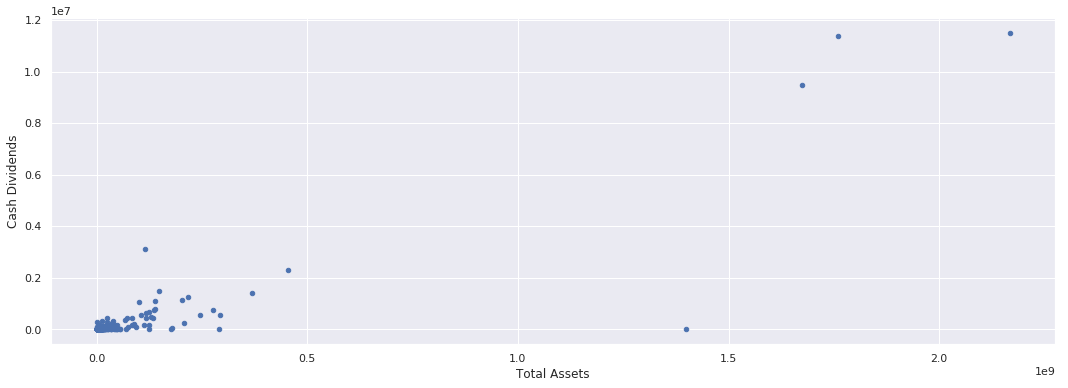

In [28]:
scatter1 = pd.concat([car_df['Total Assets'], car_df['Cash Dividends']], axis=1)
scatter1.plot.scatter(x='Total Assets', y='Cash Dividends')

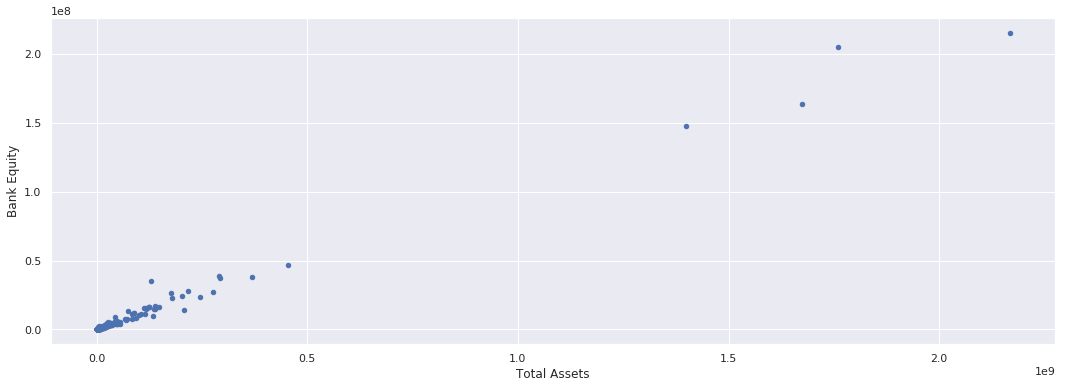

In [29]:
scatter1 = pd.concat([car_df['Total Assets'], car_df['Bank Equity']], axis=1)
scatter1.plot.scatter(x='Total Assets', y='Bank Equity')

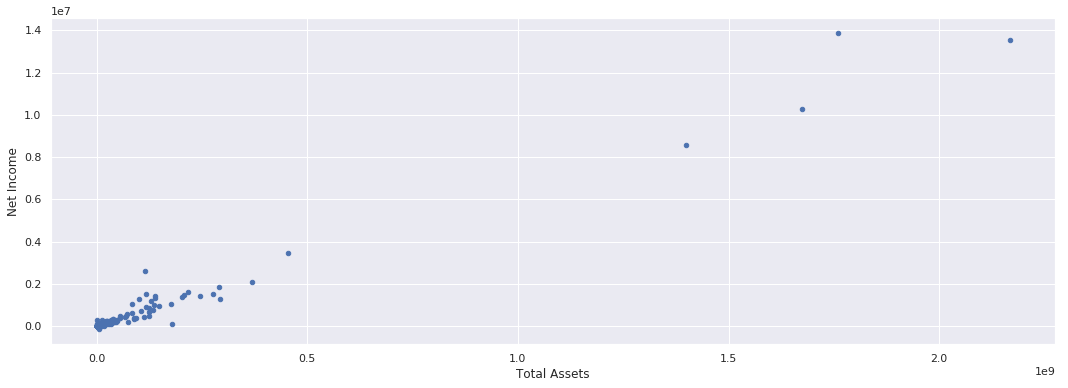

In [30]:
car_df.plot.scatter(x='Total Assets', y='Net Income');

In [31]:
# Show correlations
car_df.corr()

,Unnamed: 0,Cert,Fed RSSD,Zip,offdom,Number Employees,Total Assets,Cash & Bal Due DI,Cash Balance IB,Total Securities,FedFunds Sold Rev Purch,Net Loans Leases,Loan Allowance Loss,Trading Acct Assets,Bank Premises Fixed Assets,Other RE Owned,Goodwill Intangibles,All Other Assets,Total Liab Equity,Total Liabilities,Total Deposits,Interest-bearing Deposits,Deposits Domestic,% Insured,Feds Funds Purchased,Trading Liabilities,Other Borrowed Funds,Subordinated Debt,All Other Liabilities,Total Equity,Bank Equity,Perpertual Pref Stock,Common Stock,Surplus,Undivided Profits,Equity Minor Interest,Noncurrent Loans Leases,Noncurrent Loans Leases Guaranteed,Income Earned,Earning Assets,Long-term Assets,Average Total Assets,Average Assets Quart,Total Risk Weighted Assets,Adjusted Average Assets,Life Insurance Assets,General Acct Life Insurance,Separate Acct Life Insurance,Hybrid Life Insurance,Volatile Liabilities,Insider Loans,FHLB advances,Loans Leases held for sale,Unused Loan Commitments,Tier One Capital,Tier 2 Risk-based capital,Total Unused Commitments,Derivatives,Yield on Earning Assets,Cost of Funding Earnings Assets,Net Interest Margin,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Loan Lease Loss Prov to Assets,Net Op Inc to Assets,Return On Assets,Pretax ROA,Return on Equity,RE to Ave Equity,Net Chargeoffs to Loans,Credit Loss Prov to Chargeoffs,Efficiency Ratio,Assets per Emp,Cash Div to Net Inc,Earning Assets to Total Asst Ratio,Loss Allow to Loans,Loan Loss Allow to noncurr Loans,Noncurr Assets Other RE,Noncurrent Loans to Loans,Net Loans Lease to Tot Assets,Net Loans Lease to Deposits,Net Loans Lease to core deposits,Tot Dom Deposits to Tot Assets,Equity to Assets,Core Capital Ratio,Tier 1-based risk capital,Total risk based Capt ratio,Common Equity tier 1,Average Total Assets.1,Average earning assets,Average equity,Average Total Loans,Total Interest Income,Total Interest Expense,Net Interest Income,Provision Loan Lease Losses,Total NonInterest Income,Gross Fid Act Income,Service Charges Deposit Accts,Additional NonInterest Income,Total NonInterest Expense,Salaries Employee Benefits,Premises Equipment Expense,Additional NonInterest Expense,Pre-tax Net Op Income,Securities gains loss,Income Tax,Income before ext items,Extraordinary Gains,Net Income,Minority Interest NI,Net income of bank and min int,Net Charge-offs,Cash Dividends,Sale Conversion Ret Stock,Net Operating Income
Unnamed: 0,1.000000,-0.067548,-0.040430,-0.011890,0.006074,0.001955,-0.006031,-0.003167,-0.002932,-0.003887,-0.002197,-0.007305,-0.014955,-0.008145,-0.006538,-0.008727,-0.007198,-0.004197,-0.006031,-0.005585,-0.005029,-0.006466,-0.004012,0.033051,-0.003274,-0.009703,-0.010162,0.000076,-0.004458,-0.009756,-0.009824,-0.004454,-0.004752,-0.016558,0.006702,0.017272,0.003714,0.021727,-0.004522,-0.005929,-0.001330,-0.005643,-0.005813,-0.007888,-0.005874,-0.000264,0.007267,-0.005058,0.012181,-0.008455,0.000018,-0.003529,0.015119,-0.018373,-0.008510,-0.006264,-0.018373,-0.012324,-0.038110,-0.029498,-0.031655,-0.019491,-0.020171,-0.011211,-0.015101,-0.015142,-0.015231,-0.011225,0.003336,-0.011993,0.002022,0.009774,0.015088,-0.021921,0.018562,-0.005868,0.009316,-0.012674,0.014776,-0.037612,-0.039357,-0.000363,0.034850,-0.027390,-0.023157,-0.000405,-0.000399,-0.000409,-0.005643,-0.005503,-0.009738,-0.007389,-0.012019,-0.013600,-0.011575,-0.026707,-0.005515,0.018467,0.002170,-0.011056,-0.005550,0.001131,0.000319,-0.015354,-0.011000,-0.002897,-0.011989,-0.010677,-0.001824,-0.010716,0.007191,-0.010688,-0.026184,-0.005270,-0.016185,-0.010703
Cert,-0.067548,1.000000,0.730995,-0.123493,-0.040214,-0.034424,-0.025321,-0.027958,-0.027221,-0.022675,-0.021135,-0.022590,-0.020127,-0.021591,-0.037876,-0.013166,-0.033594,-0.028533,-0.025321,-0.025357,-0.025343,-0.022242,-0.022741,-0.172551,-0.025338,-0.023519,-0.019085,-0.014860,-0.025063,-0.024861,-0.024802,0.023386,0.012714,-0.022668,-0.024998,-0.031679,-0.022488,-0.021173,-0.022845,-0.024567,-0.021382,-0.025636,-0.0

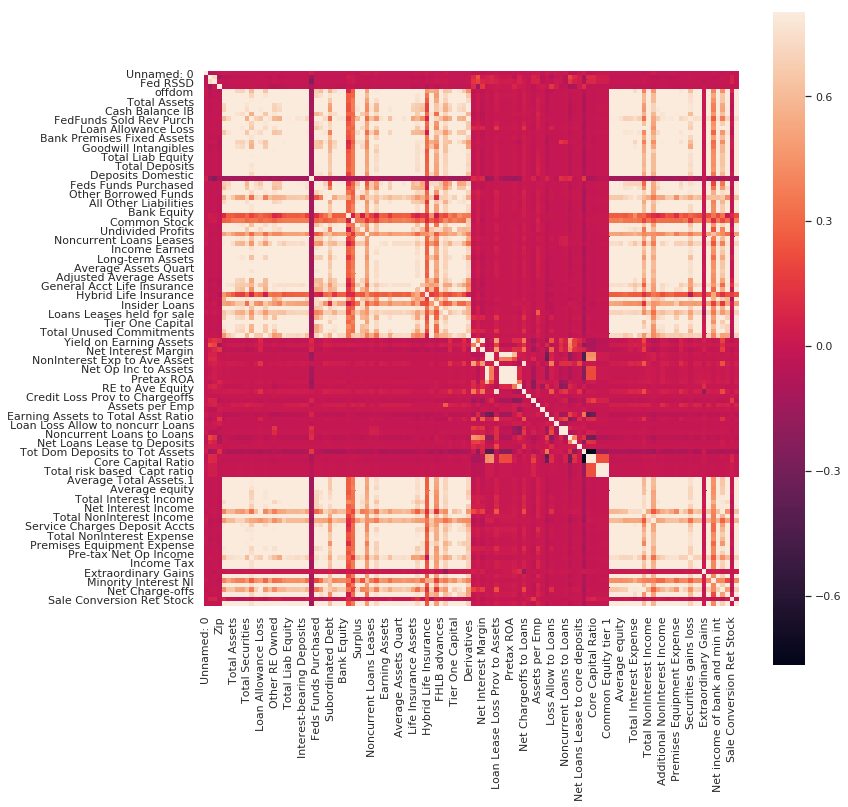

In [32]:
# Correlation visualization
corrmat = car_df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

Boxplot Total Assets

boxplot documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

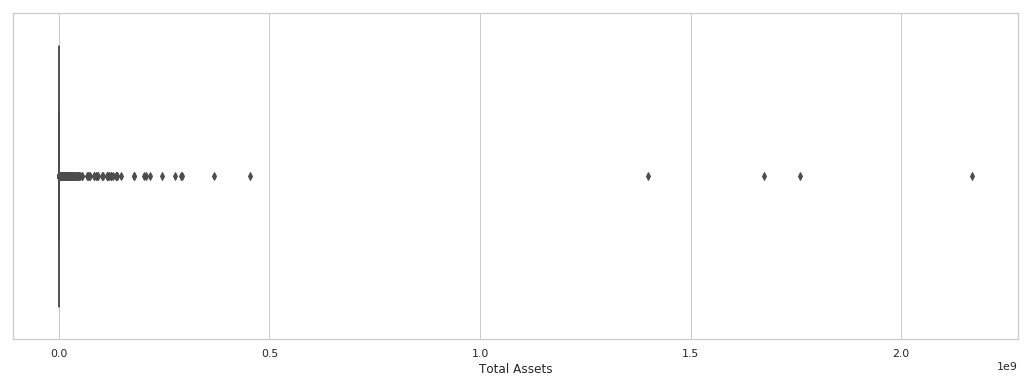

In [33]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=car_df["Total Assets"])

Pairplot


In [34]:
#sns.pairplot(car_df)

In [35]:
#sns.heatmap(car_df.corr(),cmap='coolwarm',annot=True)

In [36]:
#sns.clustermap(car_df)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
#standardizing data: Total Assets

total_assets_standardized = StandardScaler().fit_transform(car_df['Total Assets'][:,np.newaxis]);
low_range = total_assets_standardized[total_assets_standardized[:,0].argsort()][:20]
high_range= total_assets_standardized[total_assets_standardized[:,0].argsort()][-20:]
print('outer range (low) of the distribution:')
low_range

outer range (low) of the distribution:


array([[-0.06360945],
       [-0.06355689],
       [-0.0635503 ],
       [-0.06353232],
       [-0.06347673],
       [-0.06347635],
       [-0.0634706 ],
       [-0.06346734],
       [-0.06346655],
       [-0.06346303],
       [-0.06345746],
       [-0.06345107],
       [-0.06344972],
       [-0.06344503],
       [-0.0634424 ],
       [-0.06343506],
       [-0.06343395],
       [-0.06342762],
       [-0.06342695],
       [-0.06339783]])

In [39]:
print('\nouter range (high) of the distribution:')
high_range


outer range (high) of the distribution:


array([[ 2.64455174],
       [ 2.6688048 ],
       [ 2.72876032],
       [ 2.72882852],
       [ 2.89069957],
       [ 3.50555389],
       [ 3.5288029 ],
       [ 4.0002264 ],
       [ 4.11654677],
       [ 4.29053293],
       [ 4.8686457 ],
       [ 5.50372988],
       [ 5.76861785],
       [ 5.80379886],
       [ 7.35659767],
       [ 9.04742913],
       [28.04836146],
       [33.62498878],
       [35.3234806 ],
       [43.53246554]])

There are a few high variances as seen on above columns

In [40]:
perf_rat_medium_df.head()

,Fed RSSD,Bank Name,Yield on Earning Assets,Cost of Funding Earnings Assets,Net Interest Margin,NonInterest Inc to Ave Asset,NonInterest Exp to Ave Asset,Loan Lease Loss Prov to Assets,Net Op Inc to Assets,Return On Assets,Pretax ROA,Return on Equity,RE to Ave Equity,Net Chargeoffs to Loans,Credit Loss Prov to Chargeoffs,Efficiency Ratio,Assets per Emp,Cash Div to Net Inc,Earning Assets to Total Asst Ratio,Loss Allow to Loans,Loan Loss Allow to noncurr Loans,Noncurr Assets Other RE,Noncurrent Loans to Loans,Net Loans Lease to Tot Assets,Net Loans Lease to Deposits,Net Loans Lease to core deposits,Tot Dom Deposits to Tot Assets,Equity to Assets,Core Capital Ratio,Tier 1-based risk capital,Total risk based Capt ratio,Common Equity tier 1,Average Total Assets.1,Average earning assets,Average equity,Average Total Loans,Bank Size
0,746223,1880 Bank,4.147104,0.276009,3.871094,0.529423,2.628800,0.042354,1.029656,1.029656,1.358185,7.269763,7.269763,0.076867,77.083333,63.309659,7.163125,0.000000,90.027630,0.721625,34.189316,1.740395,2.110673,72.983451,87.112541,92.712709,83.780647,14.576680,13.232286,18.220839,19.062323,18.220839,349437.00,315931.33,49492.67,249781.67,Medium
1,3317192,1st Advantage Bank,4.588862,0.990295,3.598567,0.179365,2.984163,0.118263,0.421804,0.421804,0.421804,4.134866,4.134866,-0.045891,-300.000000,84.675615,5.589833,0.000000,92.760667,0.911043,2922.222222,3.227089,0.031176,85.288768,108.623832,123.886587,78.517547,10.381943,10.381301,12.109799,13.021327,12.109799,101469.00,94315.33,10351.00,87162.67,Medium
3,419255,1st Bank & Trust,4.760830,0.352438,4.408392,0.863608,2.259377,0.079230,2.522157,2.539323,2.539323,26.001719,13.494392,0.035824,375.000000,46.481934,3.678857,48.101924,91.585120,1.290111,1484.415584,0.049834,0.086910,56.600135,62.901613,64.082479,89.982008,9.799239,10.195466,19.529323,20.781123,19.529323,151457.67,137329.00,14791.33,89325.67,Medium
5,148470,1st Bank of Sea Isle City,3.809205,0.201163,3.608041,0.182900,2.959794,0.027833,0.418284,0.418284,0.532795,4.192961,4.192961,0.000000,47.607257,84.074994,6.355125,0.000000,92.157904,0.588208,60.877514,0.889046,0.966215,66.418442,75.693548,80.327229,87.746504,9.978561,10.240668,18.420919,19.145341,18.420919,251504.00,232647.00,25089.67,166249.00,Medium
6,3048487,1st Bank Yuma,5.052532,0.106564,4.945967,0.915341,3.478048,0.143412,1.363659,1.363659,1.779553,13.002251,1.950040,0.049777,389.830509,63.715077,4.948537,85.002286,90.555629,0.998879,113.526808,0.633083,0.879862,68.994004,77.524316,81.524420,88.996598,10.267469,9.843739,12.106900,12.990258,12.106900,320754.67,290903.67,33640.33,237058.33,Medium


In [41]:
my_list_ratios = list(perf_rat_medium_df.columns.values)

In [42]:
my_list_ratios

['Fed RSSD',
 'Bank Name',
 'Yield on Earning Assets',
 'Cost of Funding Earnings Assets',
 'Net Interest Margin',
 'NonInterest Inc to Ave Asset',
 'NonInterest Exp to Ave Asset',
 'Loan Lease Loss Prov to Assets',
 'Net Op Inc to Assets',
 'Return On Assets',
 'Pretax ROA',
 'Return on Equity',
 'RE to Ave Equity',
 'Net Chargeoffs to Loans',
 'Credit Loss Prov to Chargeoffs',
 'Efficiency Ratio',
 'Assets per Emp',
 'Cash Div to Net Inc',
 'Earning Assets to Total Asst Ratio',
 'Loss Allow to Loans',
 'Loan Loss Allow to noncurr Loans',
 'Noncurr Assets Other RE',
 'Noncurrent Loans to Loans',
 'Net Loans Lease to Tot Assets',
 'Net Loans Lease to Deposits',
 'Net Loans Lease to core deposits',
 'Tot Dom Deposits to Tot Assets',
 'Equity to Assets',
 'Core Capital Ratio',
 'Tier 1-based risk capital ',
 'Total risk based  Capt ratio',
 'Common Equity tier 1',
 'Average Total Assets.1',
 'Average earning assets',
 'Average equity',
 'Average Total Loans',
 'Bank Size']

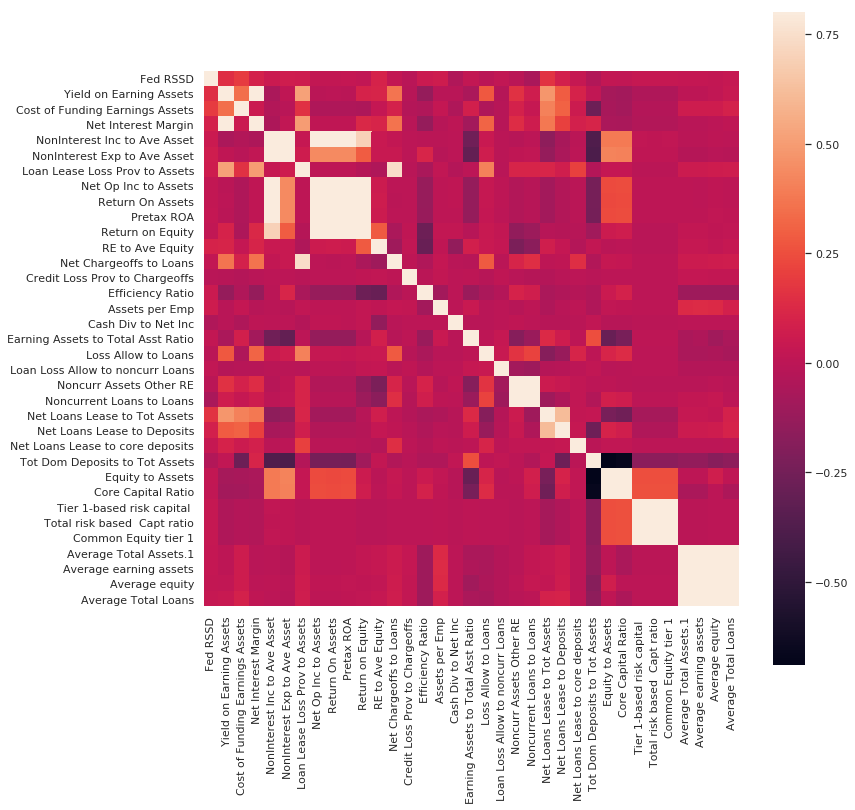

In [43]:
# Correlation visualization
corrmat = perf_rat_medium_df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [53]:
perf_rat_medium_df['Return on Equity'].describe()

count    4996.000000
mean       10.144929
std        13.035112
min       -71.745560
25%         6.596481
50%         9.813373
75%        13.147539
max       779.934535
Name: Return on Equity, dtype: float64

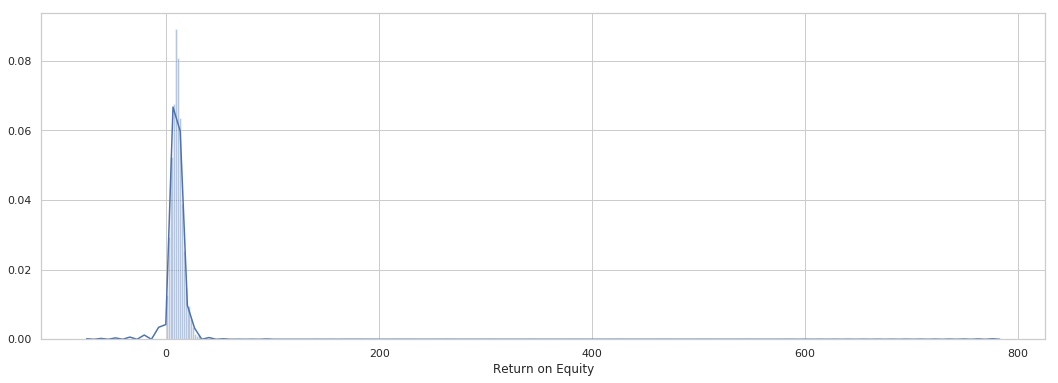

In [52]:
sns.distplot(perf_rat_medium_df['Return on Equity'],hist_kws={"range": [0,100]})


In [ ]:
s#ns.pairplot(perf_rat_medium_df)

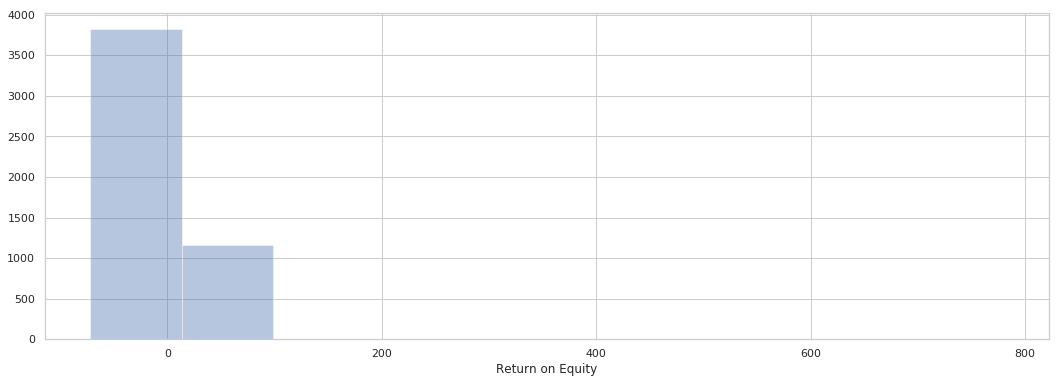

In [55]:
sns.distplot(perf_rat_medium_df['Return on Equity'],kde=False,bins=10)

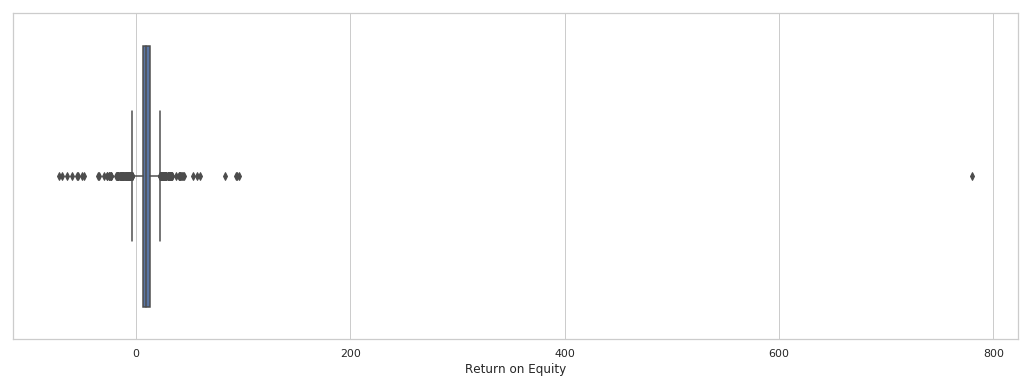

In [56]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=perf_rat_medium_df["Return on Equity"])

Correcting. We may analyze the given dataset for errors or possibly inaccurate values within features and try to current these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may completely discard a feature if it is not contributing to the analysis or may significantly skew the results.

In [72]:
perf_rat_medium_df['Bank Name'][perf_rat_medium_df['Return on Equity'] > 750]

1682    FDS Bank
Name: Bank Name, dtype: object

In [69]:
perf_rat_medium_df_1 = perf_rat_medium_df[np.abs(perf_rat_medium_df['Return on Equity']-perf_rat_medium_df['Return on Equity'].mean()) <= (3*perf_rat_medium_df['Return on Equity'].std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

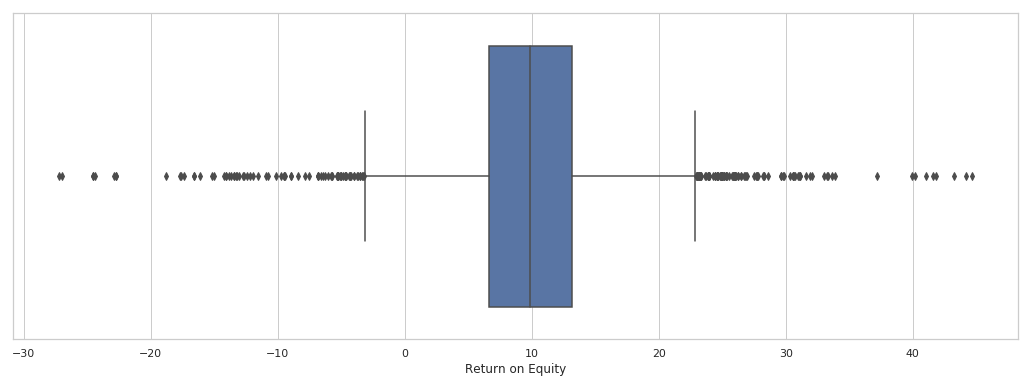

In [70]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=perf_rat_medium_df_1["Return on Equity"])

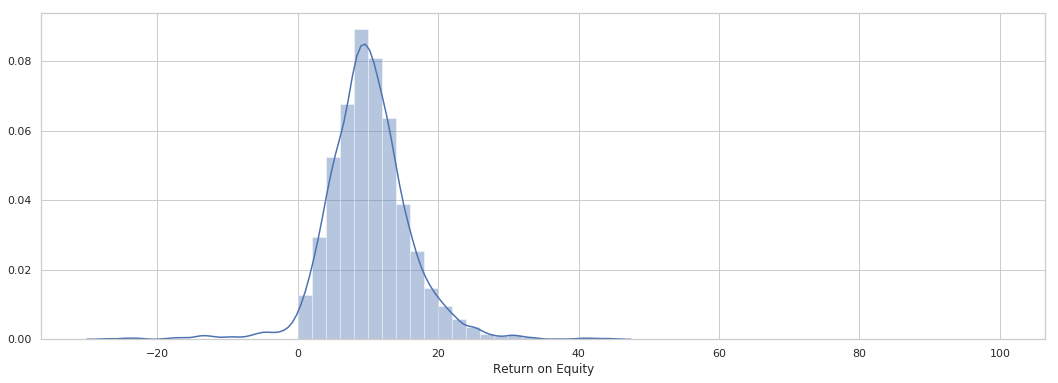

In [73]:
sns.distplot(perf_rat_medium_df_1['Return on Equity'],hist_kws={"range": [0,100]})

In [75]:
perf_rat_medium_df_1['Return on Equity'].describe()

count    4977.000000
mean       10.033356
std         5.988611
min       -27.246440
25%         6.625121
50%         9.824281
75%        13.141247
max        44.664695
Name: Return on Equity, dtype: float64

In [84]:
#mean . 
print(perf_rat_medium_df_1['Return on Equity'].mean())
print('_'*40)
#median
print(perf_rat_medium_df_1['Return on Equity'].median())
print('_'*40)
print(perf_rat_medium_df_1['Return on Equity'].std())
print('_'*40)

10.033355693279285
________________________________________
9.82428115
________________________________________
5.988611113857063
________________________________________
